In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits 

In [2]:
dataset = load_digits()

In [4]:
print(f"{dataset.data}\n")
dataset.target

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]



array([0, 1, 2, ..., 8, 9, 8])

In [6]:
print(f"{dataset.data.shape}\n{dataset.images.shape}")


(1797, 64)
(1797, 8, 8)


array([[ 0.,  0.,  1., 14.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 14., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 14.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  8., 12.,  0.,  0.],
       [ 0.,  0., 10., 14., 13., 16.,  8.,  3.],
       [ 0.,  0.,  2., 11., 12., 15., 16., 15.]])

<Figure size 432x288 with 0 Axes>

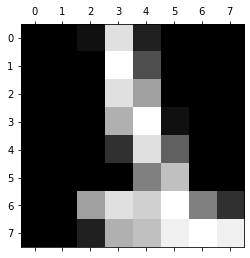

In [17]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(dataset.images[1000])
dataset.images[1000]

In [8]:
X = dataset.images.reshape((len(dataset.images),-1))
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [9]:
Y = dataset.target
Y

array([0, 1, 2, ..., 8, 9, 8])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state= 0)
X_train.shape

(1437, 64)

In [11]:
X_test.shape

(360, 64)

In [12]:
from sklearn import svm
model = svm.SVC(kernel = 'linear')
model1 = svm.SVC(kernel = 'rbf')
model2 = svm.SVC(gamma= 0.001)
model3 = svm.SVC(gamma= 0.001, C= 1)

m = [model, model1, model2, model3]
for i in m:
    i.fit(X_train, y_train)

[0]



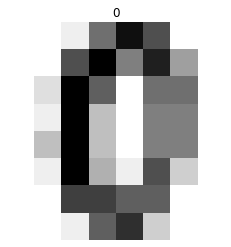

In [13]:
n = int(input())
result = model3.predict(dataset.images[n].reshape((1,-1)))
plt.imshow(dataset.images[n], cmap = plt.cm.gray_r , interpolation= 'nearest')
print(f"{result}\n")
plt.axis("off")
plt.title("%i" %result)
plt.show()

In [14]:
y_pred = model.predict(X_test)
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
acc = [accuracy_score(y_test,y_pred)*100, 
accuracy_score(y_test,y_pred1)*100, 
accuracy_score(y_test,y_pred2)*100,
accuracy_score(y_test,y_pred3)*100]

                   Model   accuracy
0   SVC(kernel='linear')  97.777778
1                  SVC()  99.166667
2       SVC(gamma=0.001)  99.166667
3  SVC(C=1, gamma=0.001)  99.166667


Text(0.5, 1.0, 'Accuracy for models')

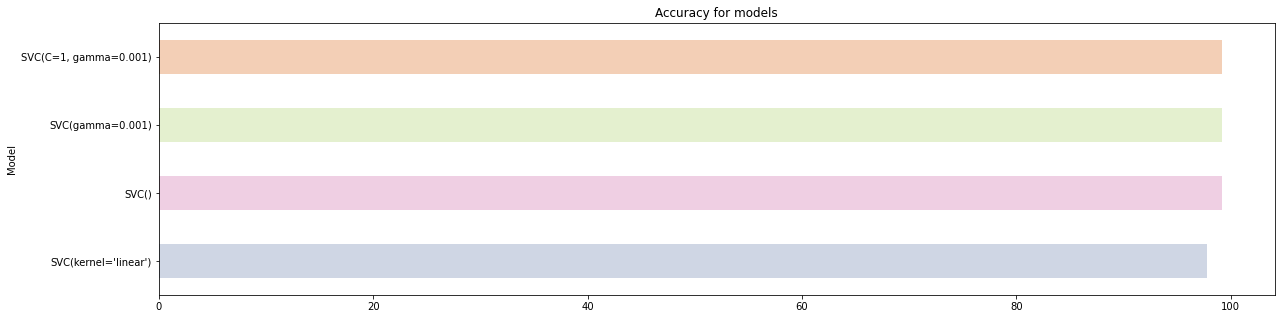

In [22]:
Models = pd.DataFrame({'Model':m,'accuracy':acc})
print(Models)
Models = Models.set_index('Model')
plt.figure(figsize=(20,5))
Models['accuracy'].sort_values().plot(kind='barh', color = ['#CFD6E4', '#EFCFE3', '#E4F0CF', '#F3CFB6', '#B9DCCC'], align='center')
plt.title('Accuracy for models')